### Comparative Analysis of Machine Learning Models on Wine Quality Data

**Aim:** To analyze the chemical properties of wines and predict their quality using various machine learning algorithms. This study aims to identify the most important factors influencing wine quality, evaluate the performance of different ML models, and provide insights into the relationship between chemical features and quality scores.

**Objective:**
1. **Dataset Preparation:** Clean and preprocess the dataset by handling missing values, outliers, and data inconsistencies. 

2. **Exploratory Data Analysis (EDA) with SQL:** Perform data querying and aggregation using SQL to explore patterns in wine quality and chemical properties.

3. **Exploratory Data Analysis (EDA) with Data Visualization:** Visualize key relationships between features (e.g., acidity, alcohol, pH) and wine quality using scatterplots, heatmaps, and histograms.

4. **Feature Engineering:** Create new features or modify existing ones, such as combining related chemical properties or transforming categorical variables for better predictive power.

5. **Model Training and Testing:** Split the dataset into training and testing sets, and train various machine learning models to predict wine quality.
    - Linear Regression
    - Logistic Regression
    - Support Vector Machines (SVM)
    - K-Nearest Neighbors 
    - Decision Trees
    - K-Means Clustering

6. **Model Evaluation and Accuracy:** Evaluate model performance using metrics like accuracy, precision, recall, F1-score to select the most effective model.

**Dataset resource:** [UCI ML Repository - Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality)

**Skill:** pandas, numpy, scipy, sqlachemy, matplotlib, seaborn, 

In [1]:
## Importing Libraries
import os
import pandas as pd
import numpy as np
from scipy.stats import zscore
import sqlite3
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


### Dataset Preparation

In [2]:
#help(os)
os.listdir(r"C:\Users\Admin\OneDrive\Desktop\Data Science\personal projects\datasets")

['housing.csv',
 'housing.tgz',
 'IMDB_Movies_Dataset.csv',
 'IMDB_Movies_Dataset.zip',
 'wine+quality.zip',
 'winequality-red.csv',
 'winequality-white.csv',
 'winequality.names']

In [3]:
# Convert csv file to dataframe
path=r"C:\Users\Admin\OneDrive\Desktop\Data Science\personal projects\datasets\winequality-red.csv"
wine_df = pd.read_csv(path, delimiter=';')
wine_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


The dataset is red wine quality having 11 physicochemical features which attributes to quality of wine in scale 1-10.
Since, the data has labelled features and a traget column `'quality'` , its is used for supervised learning.

In [4]:
wine_df.shape

(1599, 12)

The dataset has 1598 samples or entries.

In [5]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


The feature values are float type and target value integers.

In [6]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Note the mean of wine quality is `5.636`

In [7]:
# Check for null values
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no missing values in dataset.

In [8]:
wine_df["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

This shows the 681 samples have wine quality `5` and 638 samples with quality `6`, which explain the mean of quality `5.6`

Drop few duplicate samples to reduce noise in model.

In [9]:
# Check for duplicate values
'''
duplicates_all = wine_df[wine_df.duplicated(keep=False)]
print(duplicates_all)
'''
print("sum of duplicate values: ", wine_df.duplicated().sum())
wine_df.drop_duplicates()

sum of duplicate values:  240


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


z-scores shows the number of outliers in dataset for each columns.

In [10]:
# Compute Z-scores to check outliers
z_scores = zscore(wine_df.select_dtypes(include=[np.number]))
outliers = (np.abs(z_scores) > 3)
print(outliers.sum(axis=0))  # Number of outliers per column

fixed acidity           12
volatile acidity        10
citric acid              1
residual sugar          30
chlorides               31
free sulfur dioxide     22
total sulfur dioxide    15
density                 18
pH                       8
sulphates               27
alcohol                  8
quality                 10
dtype: int64


### Exploratory Data Analysis (EDA) with SQL

Analysis of data using sql to understand the data and patterns help draw insights and datermine the model to train the data on.

In [11]:
%load_ext sql

In [12]:
import prettytable
prettytable.DEFAULT = 'DEFAULT'

conn = sqlite3.connect('wine.db')
cursor = conn.cursor()

%sql sqlite:///wine.db
    
# Write the DataFrame to a SQL table (if the table doesn't exist, it will be created)
wine_df.to_sql("WINETABLE", conn, if_exists='replace', index=False, method="multi")

1599

In [13]:
%sql SELECT name FROM sqlite_master WHERE type='table';

 * sqlite:///wine.db
Done.


name
WINETABLE


In [14]:
%sql SELECT * FROM WINETABLE LIMIT 5

 * sqlite:///wine.db
Done.


fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6
7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [15]:
%sql SELECT quality, COUNT(*) AS count FROM WINETABLE GROUP BY quality;

 * sqlite:///wine.db
Done.


quality,count
3,10
4,53
5,681
6,638
7,199
8,18


Group the count of wine samples based on the alcohol level having **10** as `Low` level, **10-12** as `Medium` and above **12** as `High` 

In [16]:
%%sql 
SELECT 
    CASE 
        WHEN alcohol < 10 THEN 'Low'
        WHEN alcohol BETWEEN 10 AND 12 THEN 'Medium'
        ELSE 'High'
    END AS alcohol_level,
    COUNT(*) AS count
FROM WINETABLE
GROUP BY alcohol_level;

 * sqlite:///wine.db
Done.


alcohol_level,count
High,141
Low,680
Medium,778


The impact of `fixed acidity` and `volatile acidity` on the `quality` of wine

In [17]:
%%sql 
SELECT 
    AVG("fixed acidity") AS avg_fixed_acidity,
    AVG("volatile acidity") AS avg_volatile_acidity,
    AVG(quality) AS avg_quality
FROM WINETABLE
GROUP BY quality;

 * sqlite:///wine.db
Done.


avg_fixed_acidity,avg_volatile_acidity,avg_quality
8.36,0.8845000000000001,3.0
7.779245283018868,0.6939622641509429,4.0
8.167254038179149,0.5770411160058732,5.0
8.347178683385575,0.49748432601880965,6.0
8.872361809045225,0.4039195979899498,7.0
8.566666666666665,0.4233333333333334,8.0


In [18]:
# Close the connection to db
conn.close()

### Exploratory Data Analysis (EDA) with Data Visualization

Visually analysing the count of wine quality in scale 1-10

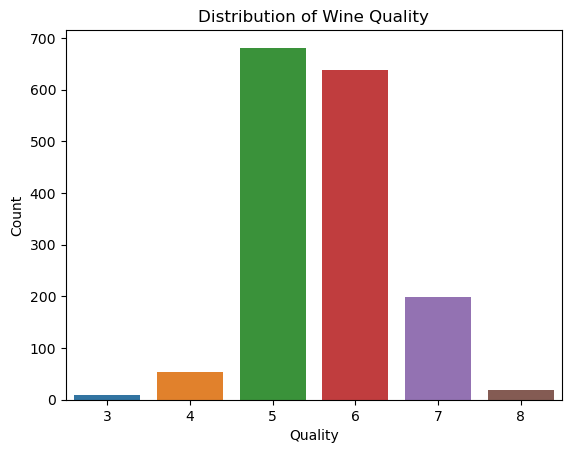

In [19]:
sns.countplot(x='quality', data=wine_df)
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

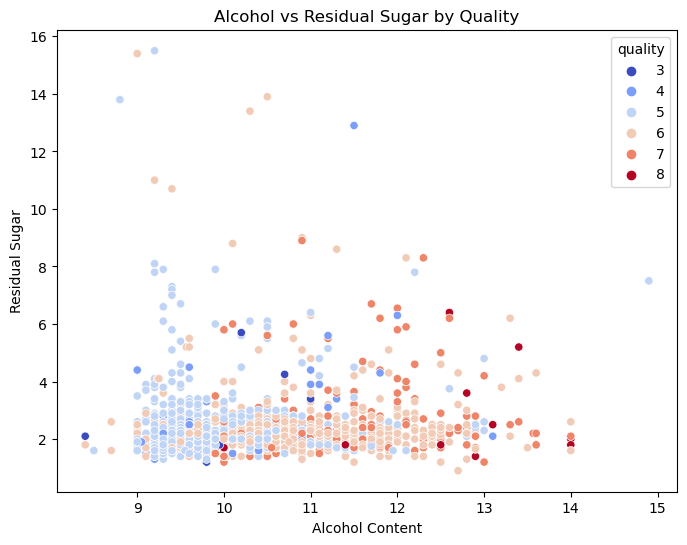

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='alcohol', y='residual sugar', hue='quality', data=wine_df, palette='coolwarm')
plt.title('Alcohol vs Residual Sugar by Quality')
plt.xlabel('Alcohol Content')
plt.ylabel('Residual Sugar')
plt.show()

The wine quality is high when the alcohol content is high and residual sugar is low

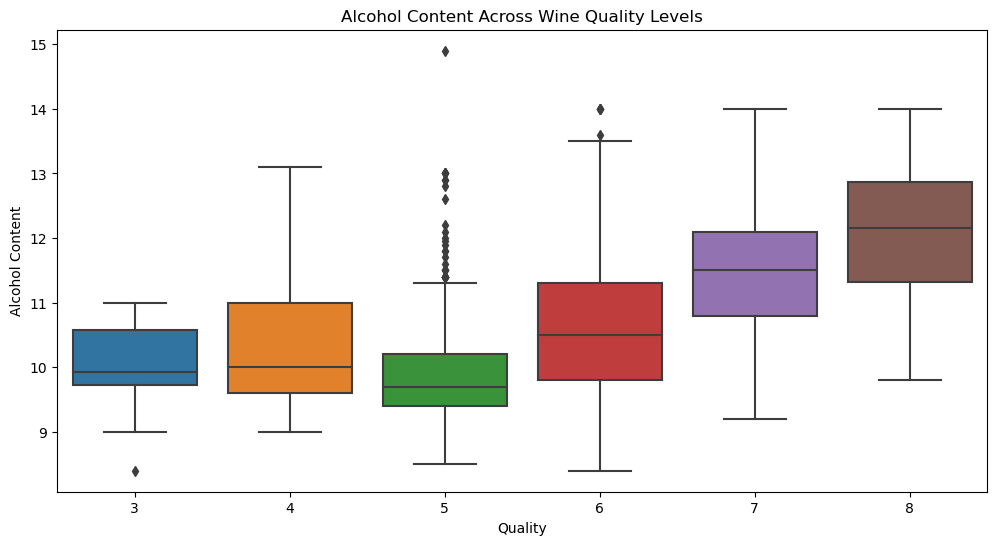

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='quality', y='alcohol', data=wine_df)
plt.title('Alcohol Content Across Wine Quality Levels')
plt.xlabel('Quality')
plt.ylabel('Alcohol Content')
plt.show()

There are few outliers in quality with respect to alcohol content.

**Correlation Matrix** to identify relationships between features and the target, helping with feature selection and understanding data patterns.

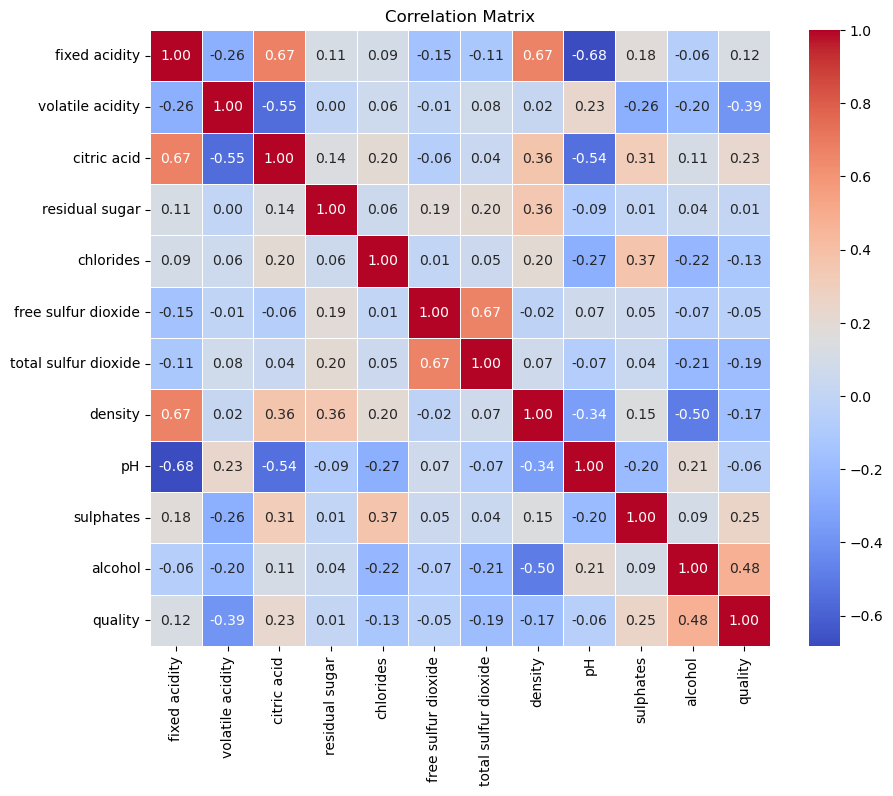

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(wine_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

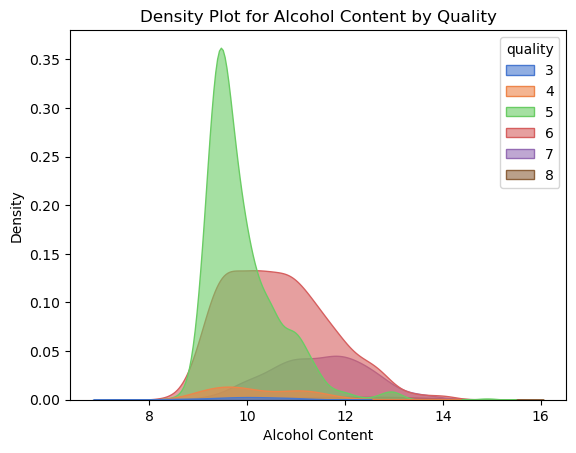

In [23]:
sns.kdeplot(data=wine_df, x='alcohol', hue='quality', fill=True, palette='muted', alpha=0.6)
plt.title('Density Plot for Alcohol Content by Quality')
plt.xlabel('Alcohol Content')
plt.ylabel('Density')
plt.show()

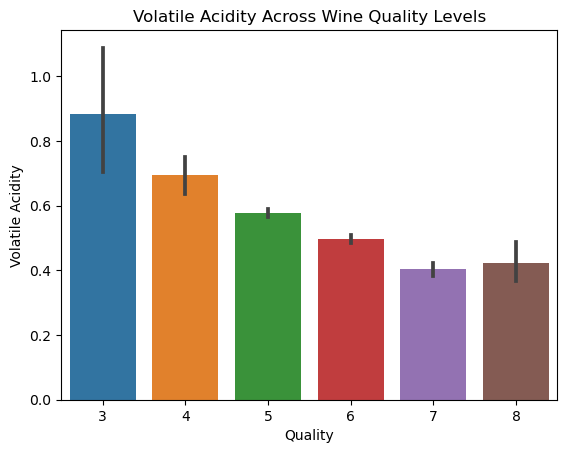

In [24]:
sns.barplot(x='quality', y='volatile acidity', data=wine_df)
plt.title('Volatile Acidity Across Wine Quality Levels')
plt.xlabel('Quality')
plt.ylabel('Volatile Acidity')
plt.show()

### Model Training and Testing

Split the data samples into training and testing set

In [25]:
# Define Features and Target
X = wine_df.drop(['quality'], axis=1)
y = wine_df['quality']

# Split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Define function to plot confusion matrix for each models testing

In [65]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(range(3,9)); ax.yaxis.set_ticklabels(range(3,9))
    plt.show() 

#### 1. Linear Regression

In [27]:
# Initialize Linear regression and train the model
lin_regr = LinearRegression()
lin_regr.fit(X_train, y_train)

# Predict and evaluate
y_pred_lin = lin_regr.predict(X_test)
mse_lin_regr = mean_squared_error(y_test, y_pred_lin)
print(f"Linear Regression MSE: {mse_lin_regr:.2f}")

Linear Regression MSE: 0.39


#### 2. Logistic Regression

In [39]:
# Initialize Logistic regression and train the model 

parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

log_regr = LogisticRegression()
logreg_cv = GridSearchCV(estimator=log_regr, cv=10, param_grid=parameters, scoring='accuracy')
logreg_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring='accuracy')

In [29]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.5864234744094488


In [30]:
logreg_acc = logreg_cv.score(X_test, y_test)
print("accuracy: ", logreg_acc)

accuracy:  0.546875


In [40]:
print(f"Training Accuracy: {logreg_cv.score(X_train, y_train):.2f}")
print(f"Testing Accuracy: {logreg_cv.score(X_test, y_test):.2f}")

Training Accuracy: 0.59
Testing Accuracy: 0.55


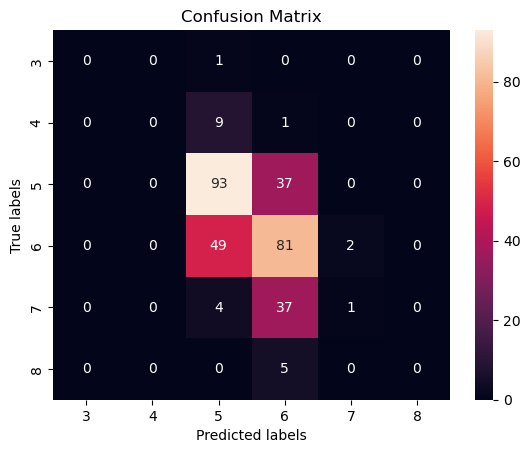

In [66]:
yhat_log=logreg_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat_log)

wine quality `5` has correct predicted 93 samples, `6` has 81 and so on

#### 3. Support Vector Machines (SVM)

In [41]:
svm = SVC(kernel='rbf', C=10, gamma=0.1, random_state=42)
svm.fit(X_train, y_train)

SVC(C=10, gamma=0.1, random_state=42)

In [42]:
svm_acc = svm.score(X_test, y_test)
print("acuuracy: ", svm_acc)

acuuracy:  0.5375


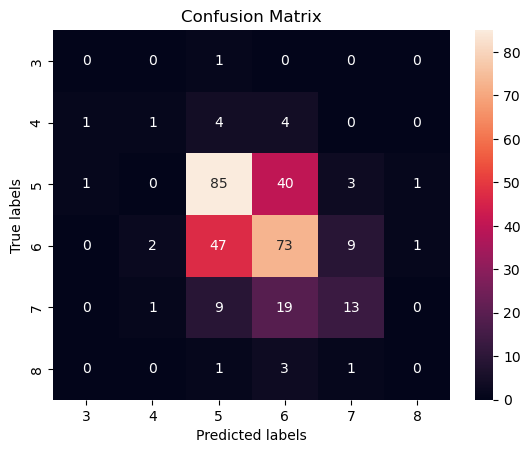

In [67]:
yhat=svm.predict(X_test)
plot_confusion_matrix(y_test,yhat)

#### 4. K-Nearest Neighbors (KNN)

In [55]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

knn = KNeighborsClassifier()

knn_cv = GridSearchCV(estimator=knn, scoring="accuracy", cv=10, param_grid=parameters)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]},
             scoring='accuracy')

In [56]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 1, 'p': 2}
accuracy : 0.6043430118110236


In [57]:
knn_acc = knn_cv.score(X_test, y_test)
knn_acc

0.50625

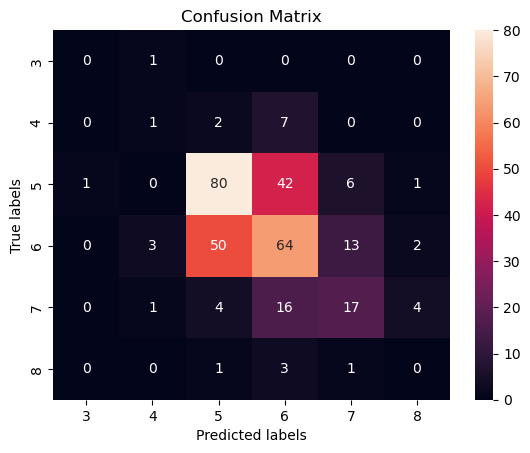

In [68]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

#### 5. Decision Tree

In [50]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(estimator=tree, scoring="accuracy", cv=10, param_grid=parameters)
tree_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [51]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 18, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
accuracy : 0.6310039370078739


In [52]:
tree_acc = tree_cv.score(X_test, y_test)
tree_acc

0.55

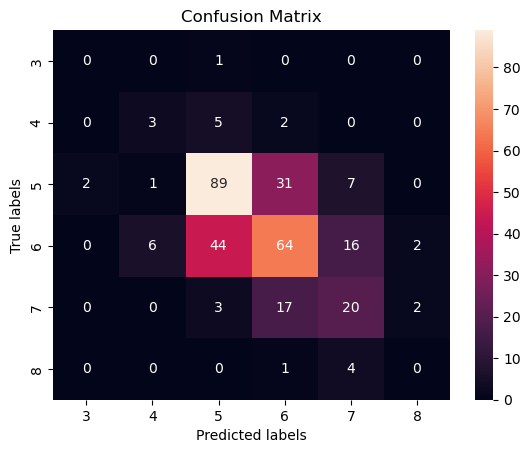

In [69]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

The wine qaulity of `5` has **89** correct predictions, `6` has predicted **64** and `7` has **17** 

### Model Evaluation

Comparing the accuracy of each model prediction to find model with best parameter.

In [60]:
results = {
    'Model': ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree'],
    'Accuracy': [
        accuracy_score(y_test, yhat_log),
        accuracy_score(y_test, svm.predict(X_test)),
        accuracy_score(y_test, knn_cv.predict(X_test)),
        accuracy_score(y_test, tree_cv.predict(X_test))
    ],
    'Precision': [
        precision_score(y_test, yhat_log, average='macro'),
        precision_score(y_test, svm.predict(X_test), average='macro'),
        precision_score(y_test, knn_cv.predict(X_test), average='macro'),
        precision_score(y_test, tree_cv.predict(X_test), average='macro')
    ],
    'Recall': [
        recall_score(y_test, yhat_log, average='macro'),
        recall_score(y_test, svm.predict(X_test), average='macro'),
        recall_score(y_test, knn_cv.predict(X_test), average='macro'),
        recall_score(y_test, tree_cv.predict(X_test), average='macro')
    ],
    'F1-Score': [
        f1_score(y_test, yhat_log, average='macro'),
        f1_score(y_test, svm.predict(X_test), average='macro'),
        f1_score(y_test, knn_cv.predict(X_test), average='macro'),
        f1_score(y_test, tree_cv.predict(X_test), average='macro')
    ]
}

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.546875,0.238765,0.225472,0.207949
1,SVM,0.537500,0.308902,0.269400,0.279612
2,KNN,0.506250,0.282486,0.267499,0.273247
3,Decision Tree,0.550000,0.318136,0.324276,0.320345


**Decision tree** has maximum accuracy of `0.55` among all the models.

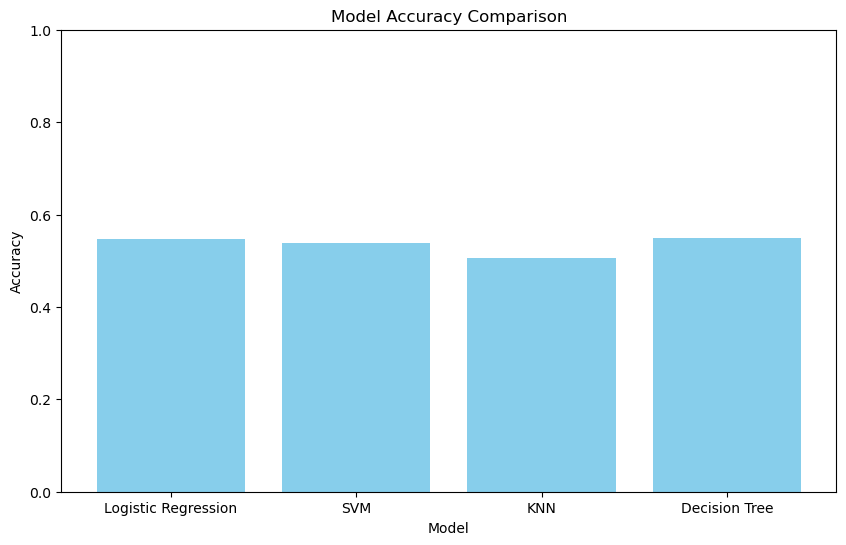

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Accuracy'], color='skyblue')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()